In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.time_series import illustration, demo

# Konsep Stationarity
sebuah time series disebut stationary ketika sifatnya tidak bergantung terhadap waktu.<br>Time series yang stationary tidak memiliki pola yang predictable pada jangka waktu yang panjang. Contoh: <br>
- Stationary : White Noise, Cyclical Time Series yang <b>aperiodic, tanpa trend, tanpa seasonality</b><br>
- Tidak Stationary : Time Series dengan trend atau seasonality

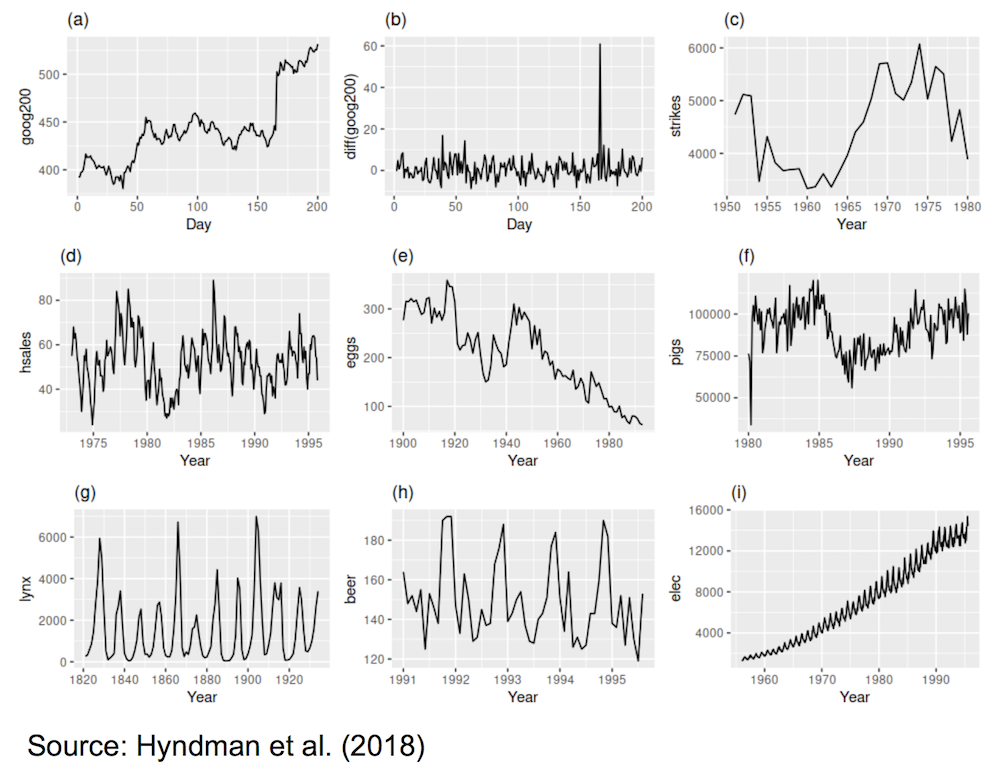

In [2]:
illustration.stationarity_quiz

`d`, `h`, `i` : <b>Seasonal<br>
`a`, `c`, `e`, `f`, `i` : <b>Trend<br>
`b` dan `g` : <b>Stationary



# Uji Stationarity menggunakan ADF dan KPSS
ADF = Augmented Dickey-Fuller Test<br>
KPSS = Kwiatkowski-Phillips-Schmidt-Shin Test

In [3]:
from jcopml.time_series import stationarity_tester

## Example 1 : data stationary

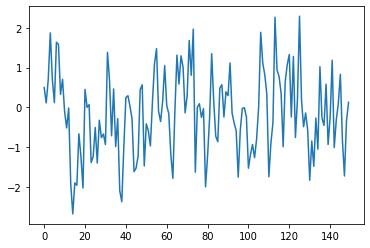

In [4]:
plt.plot(demo.stnry_data)

In [5]:
stationarity_tester(demo.stnry_data)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.863231,5.216419e-12,-3.475018,-2.881141,-2.577221,True
KPSS,0.131065,1.000000e-01,0.739000,0.463000,0.347000,False


## Example 2 : trending data

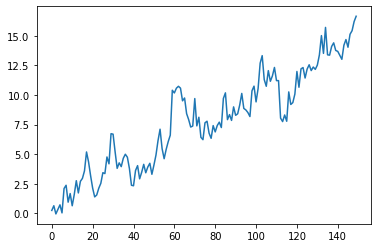

In [6]:
plt.plot(demo.trending_data)

In [7]:
stationarity_tester(demo.trending_data)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.077376,0.724009,-3.475325,-2.881275,-2.577293,False
KPSS,1.661763,0.010000,0.739000,0.463000,0.347000,True


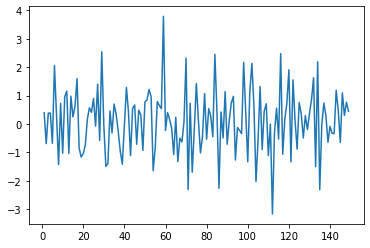

In [8]:
plt.plot(demo.trending_data.diff())

In [9]:
stationarity_tester(demo.trending_data.diff())

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.416320,8.048078e-27,-3.475325,-2.881275,-2.577293,True
KPSS,0.035351,1.000000e-01,0.739000,0.463000,0.347000,False


menggunakan difference agar data menjadi stationary atau diff()

## Example 3 : seasonal data

<AxesSubplot:xlabel='date'>

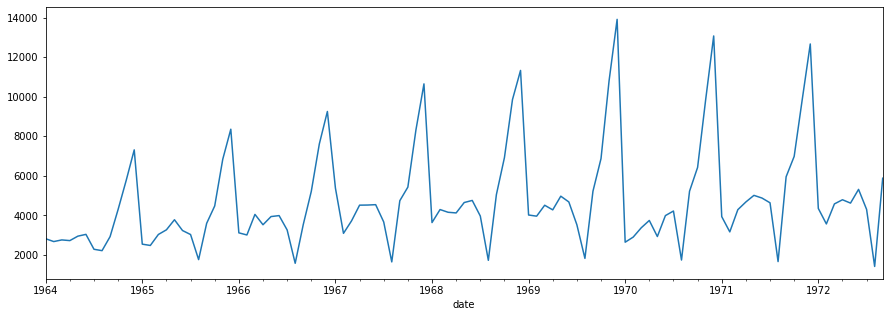

In [10]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\perrin_freres_champagne.csv", index_col="date", parse_dates=['date'])
series = df['sales']

series.plot(figsize=(15,5))

In [11]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.833593,0.363916,-3.502705,-2.893158,-2.583637,False
KPSS,0.512672,0.038813,0.739000,0.463000,0.347000,True


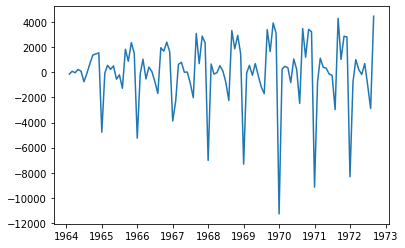

In [12]:
plt.plot(series.diff())

<AxesSubplot:xlabel='date'>

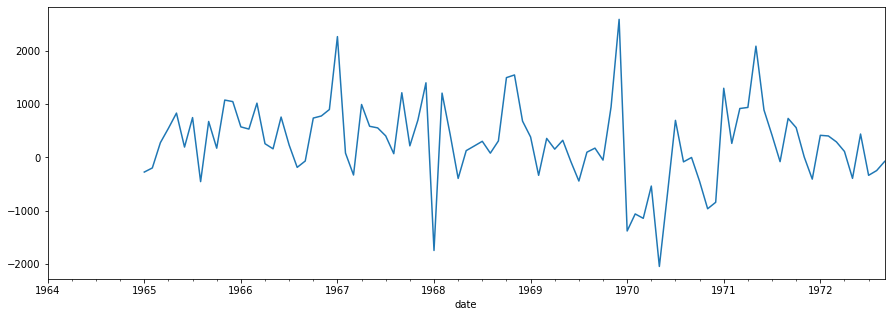

In [13]:
series.diff(12).plot(figsize=(15,5))

In [14]:
stationarity_tester(series.diff())

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.189896,2.519620e-10,-3.503515,-2.893508,-2.583824,True
KPSS,0.411806,7.206656e-02,0.739000,0.463000,0.347000,False


## Example 4 : seasonal and trending data

<AxesSubplot:xlabel='Date'>

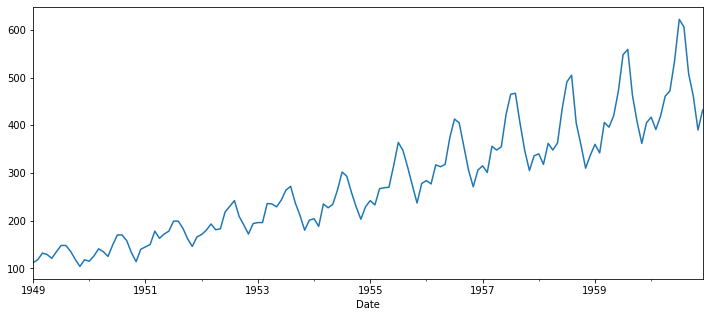

In [15]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\airline.csv", index_col="Date", parse_dates=['Date'])
series = df['passengers']

series.plot(figsize=(12,5))

In [16]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,0.815369,0.99188,-3.481682,-2.884042,-2.57877,False
KPSS,1.651312,0.01000,0.739000,0.463000,0.34700,True


In [17]:
stationarity_tester(series.diff())

ADF:        Series is non-stationary
KPSS:       Series is trend stationary
Conclusion: Series is trend stationary. Try detrending the series.


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-2.829267,0.054213,-3.481682,-2.884042,-2.57877,False
KPSS,0.023898,0.100000,0.739000,0.463000,0.34700,False


In [18]:
from jcopml.time_series.decomposition import stl_decomposition

components = stl_decomposition(series)
stationarity_tester(components.resid)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.098011,0.000014,-3.480119,-2.883362,-2.578407,True
KPSS,0.021308,0.100000,0.739000,0.463000,0.347000,False


# AutoRegressive Model AR(p)
Menggunakan nilai sebelumnya sebagai fitur regresi<br>
<b>y<sub>t</sub> = c + &phi;<sub>1</sub>y<sub>t-1</sub> + &phi;<sub>2</sub>y<sub>t-2</sub> + ... + &phi;<sub>p</sub>y<sub>t-p</sub> + &epsilon;<sub>t</sub></b><br>
Biasanya digunakan pada data yang stationary, tentunya dengan &phi; yang telah dibatasi<br>

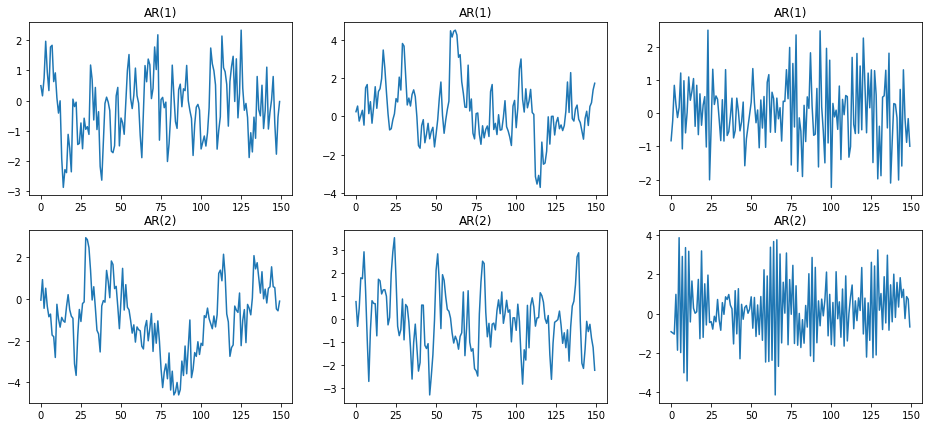

In [19]:
demo.AR_example()

# Moving Average Model MA(q)
Menggunakan nilai error sebelumnya sebagai fitur regresi<br>
<b>y<sub>t</sub> = c + &epsilon;<sub>t</sub> + &theta;<sub>1</sub>&epsilon;<sub>t-1</sub> + &theta;<sub>2</sub>&epsilon;<sub>t-2</sub> + ... + &theta;<sub>q</sub>&epsilon;<sub>t-q</sub></b><br>

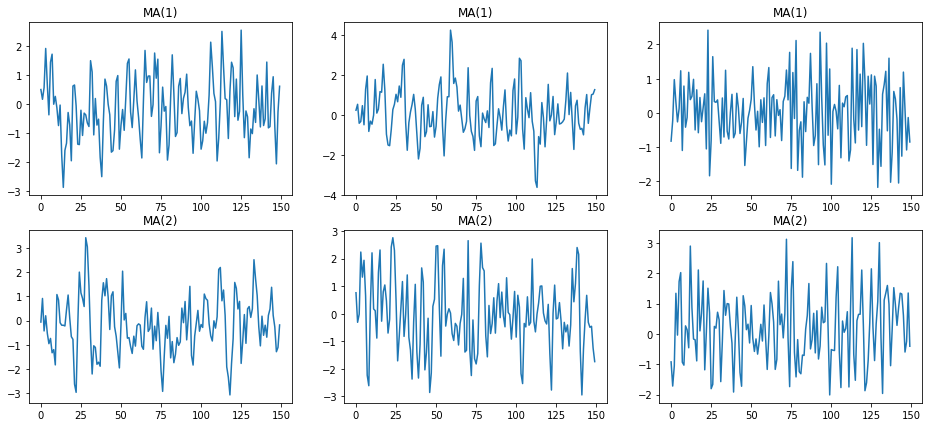

In [20]:
demo.MA_example()

# Bagaimana memilih model ARMA(p,q) -> ACF dan PACF
<b>y<sub>t</sub> = c + &phi;<sub>1</sub>y<sub>t-1</sub> + &phi;<sub>2</sub>y<sub>t-2</sub> + ... + &phi;<sub>p</sub>y<sub>t-p</sub> + &epsilon;<sub>t</sub> + &theta;<sub>1</sub>&epsilon;<sub>t-1</sub> + &theta;<sub>2</sub>&epsilon;<sub>t-2</sub> + ... + &theta;<sub>q</sub>&epsilon;<sub>t-q</sub><br>

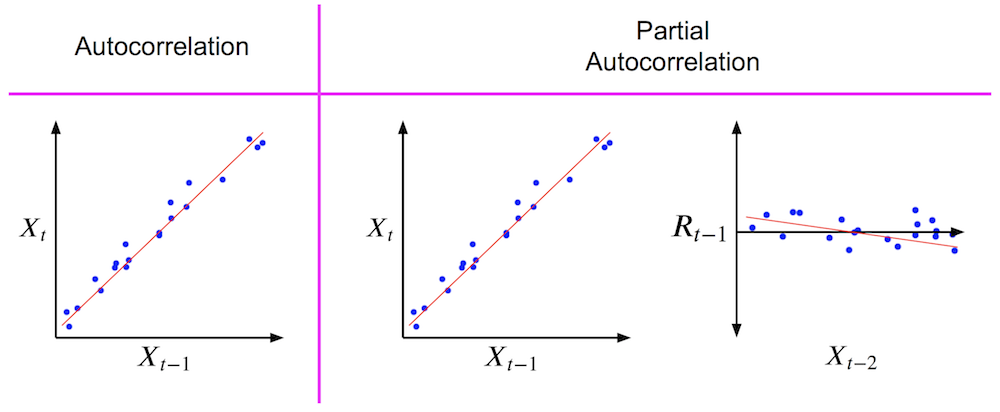

In [21]:
illustration.autocorrelation

## Menentukan ore AR(p)

ACF: Damped Geometric<br>
PACF: Signifikan hingga berapa data sebelumnya p / lag p

In [22]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.6, description='alpha1', max=2.0, min=-2.0), Output()), _dom_classes…

In [23]:
demo.AR2_simulation()

interactive(children=(FloatSlider(value=0.5, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=0.3, …

nilai p melihat PACF nya

## Menentukan orde MA(q)

ACF: Signifikan hingga berapa data sebelumnya p / lag p<br>
PACF: Damped Geometric

In [24]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), Output()), _dom_classes…

In [25]:
demo.MA2_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), FloatSlider(value=0.6, …

melihat q dari ACF

# ARMA(p,q) Model

In [26]:
demo.AR2MA2_simulation()

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=-0.4,…

## Nonstationary Data Series? ARIMA(p,d,q)

d:\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


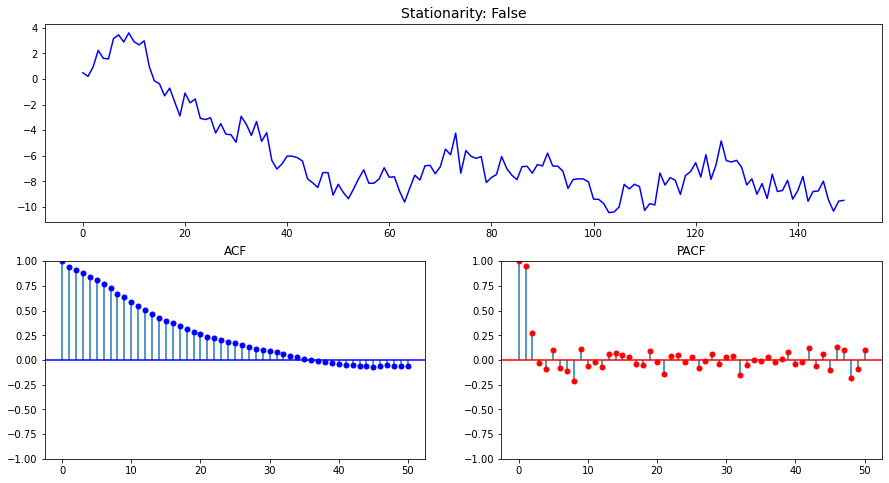

In [27]:
demo.nonstationarity_simulation()

d:\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


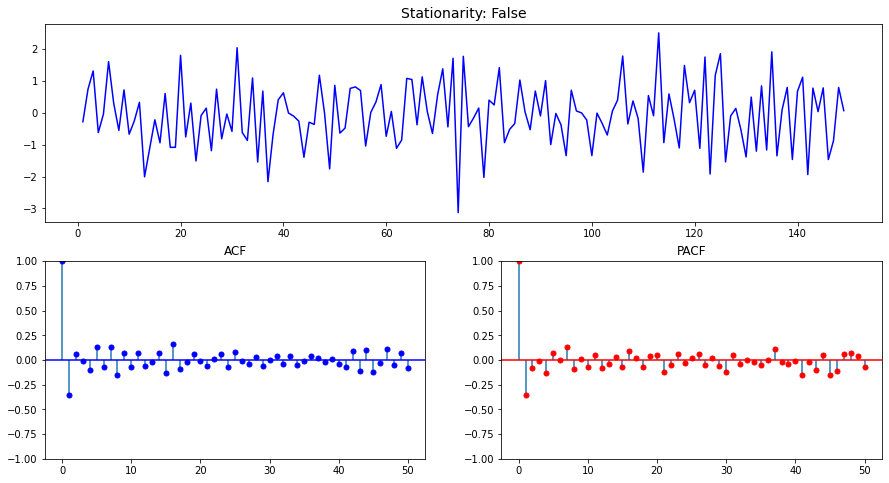

In [28]:
demo.nonstationarity_simulation(diff=True)

ARIMA(1,1,1)

# Recommended way -> Model Search dengan AIC, AICc, BIC
AIC = Akaike Information Criterion<br>
AICc = Corrected Akaike Information Criterion<br>
BIC = Bayesian Information Criterion

Mereka bertiga merupakan penilaian kualitas suatu model yang dapat digunakan untuk model selection.<br>
Sayangnya mereka agak kurang cocok untuk menentukan diferensiasi yang tepat.<br>

# Auto ARIMA

In [29]:
from pmdarima import auto_arima

<AxesSubplot:xlabel='Date'>

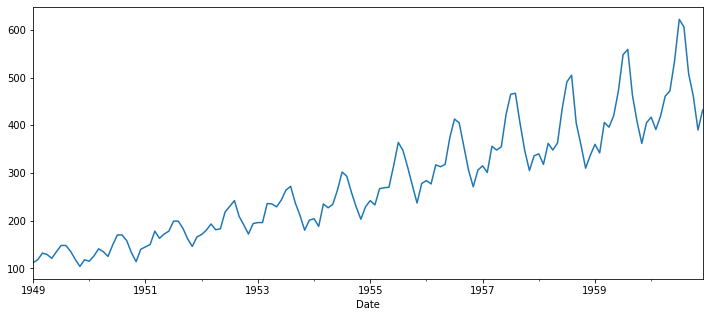

In [30]:
df = pd.read_csv("D:\Python\File Python\Machine Learning\Wira Time Series\sumber\Classic Time Series\data\\airline.csv", index_col="Date", parse_dates=['Date'])
series = df['passengers']

X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(12,5))

In [31]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, suppress_warnings=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AICC=807.172, Time=1.94 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=900.025, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=803.805, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=852.869, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=1051.707, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=802.465, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AICC=803.877, Time=0.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AICC=805.913, Time=0.72 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AICC=802.029, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AICC=803.787, Time=0.50 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AICC=803.864, Time=0.37 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AICC=inf, Time=1.12 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AICC=802.349, Time=0.23 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AICC=802.578, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[

ARIMA(2,0,0)

In [32]:
arima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [33]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Mon, 26 Dec 2022   AIC                            801.679
Time:                                    18:57:41   BIC                            812.370
Sample:                                01-01-1949   HQIC                           806.013
                                     - 11-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

# dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq='M')
# pred = pd.Series(pred, index=dates)

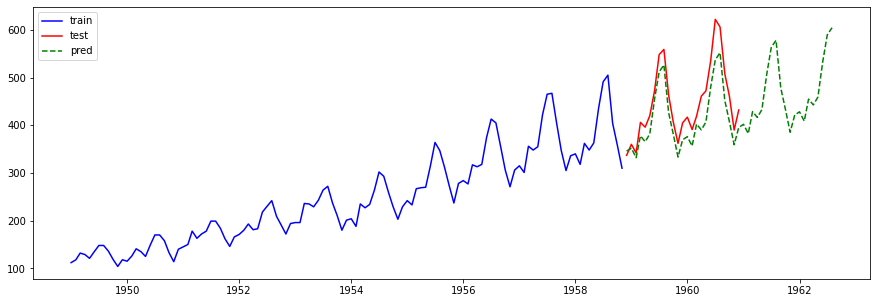

In [35]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="pred")
plt.legend()